In [1]:
#!pip install transliterate
#!pip instal fasttext

In [2]:
! pip install -r requirements.txt

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.3/2.3 GB 880.3 kB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.2/3.2 MB 88.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.2/6.2 MB 110.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 410.5/410.5 kB 10.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 68.8/68.8 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35.3/35.3 MB 44.8 MB/s eta 0:0

In [3]:
from ast import literal_eval
import json
import re
import gc
import fasttext

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from scipy.sparse import coo_matrix, hstack

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score, multilabel_confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

import torch
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR, ReduceLROnPlateau
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, WeightedRandomSampler
from torch.nn import functional as F
from tqdm.notebook import tqdm
from IPython.display import clear_output

from transformers import (
    BertTokenizer, BertForSequenceClassification, AdamW,
    get_linear_schedule_with_warmup, DistilBertTokenizer,
    AutoModelForSequenceClassification, DistilBertForSequenceClassification,
    RobertaTokenizer, RobertaForSequenceClassification, AutoModel,
    AutoTokenizer, Trainer, TrainingArguments
)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df_topics = pd.read_excel('data/yt_topics_10_500.xlsx')

In [5]:
df_topics['topic'].value_counts().head(50)

?                                 500
–≠–∑–æ—Ç–µ—Ä–∏–∫–∞                         494
–£–≤–ª–µ—á–µ–Ω–∏–µ –∏ —Ö–æ–±–±–∏                 483
–ê–≤—Ç–æ/–ú–æ—Ç–æ                         473
–°–ø–æ—Ä—Ç                             471
–ú—É–∑—ã–∫–∞                            471
–õ–∞–π—Ñ—Å—Ç–∞–π–ª                         456
–Æ–º–æ—Ä                              439
–ö–∏–Ω–æ                              431
–†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è                       415
–ò–≥—Ä—ã                              396
–ò–≥—Ä—ã, –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è                  94
–†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è, –Æ–º–æ—Ä                  45
–ö–∏–Ω–æ, –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è                  30
–Æ–º–æ—Ä, –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è                  28
–ö–∏–Ω–æ, –Æ–º–æ—Ä                         21
–õ–∞–π—Ñ—Å—Ç–∞–π–ª, –£–≤–ª–µ—á–µ–Ω–∏–µ –∏ —Ö–æ–±–±–∏       17
–ê–≤—Ç–æ/–ú–æ—Ç–æ, –£–≤–ª–µ—á–µ–Ω–∏–µ –∏ —Ö–æ–±–±–∏       14
–†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è, –ö–∏–Ω–æ                  14
–ú—É–∑—ã–∫–∞, –£–≤–ª–µ—á–µ–Ω–∏–µ –∏ —Ö–æ–±–±–∏          13
–°–ø–æ—Ä—Ç, –†

–ö–∞–∫ –≤–∏–¥–∏–º, –µ—Å—Ç—å —ç–∫–∑–µ–º–ø–ª—è—Ä—ã —Å –æ–¥–Ω–∏–º –∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –∫–ª–∞—Å—Å–∞–º–∏.  
–ï—Å–ª–∏ –æ—Å—Ç–∞–≤–∏—Ç—å –∫–∞–∫ –µ—Å—Ç—å, —Ç–æ –∫–ª–∞—Å—Å—ã —Å–∏–ª—å–Ω–æ –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã.  
–¢–æ–≥–¥–∞ –º–æ–∂–Ω–æ –∏—Ö –ø—Ä–∏—Å–æ–µ–¥–∏–Ω–∏—Ç—å –∫ —Ç–æ–º—É –∫–ª–∞—Å—Å—É, –∫–æ—Ç–æ—Ä—ã–π –∏–¥–µ—Ç –≤ —Å–ø–∏—Å–∫–µ –ø–µ—Ä–≤—ã–º.  
–õ–∏–±–æ —É–¥–∞–ª–∏—Ç—å, —á—Ç–æ–±—ã –Ω–µ –¥–æ–±–∞–≤–ª—è—Ç—å –≤ –∫–ª–∞—Å—Å —Å–º–µ—à–∞–Ω–Ω—ã–µ —ç–∫–∑–µ–º–ø–ª—è—Ä—ã.

–í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –≤–æ–∑—å–º–µ–º –ø–µ—Ä–≤—ã–π –∫–ª–∞—Å—Å –∫–∞–∫ –æ—Å–Ω–æ–≤–Ω–æ–π, –∞ –≤—Ç–æ—Ä–æ—Å—Ç–µ–ø–µ–Ω–Ω—ã–π –æ—Ç–±—Ä–æ—Å–∏–º.

In [6]:
df_topics['topic_one'] = df_topics['topic'].str.split(',').apply(lambda x: x[0])

In [7]:
df_topics['topic_one'].value_counts().head(50)

–†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è          500
–Æ–º–æ—Ä                 500
–ö–∏–Ω–æ                 500
–ò–≥—Ä—ã                 500
–ê–≤—Ç–æ/–ú–æ—Ç–æ            500
–ú—É–∑—ã–∫–∞               500
–£–≤–ª–µ—á–µ–Ω–∏–µ –∏ —Ö–æ–±–±–∏    500
–õ–∞–π—Ñ—Å—Ç–∞–π–ª            500
–≠–∑–æ—Ç–µ—Ä–∏–∫–∞            500
–°–ø–æ—Ä—Ç                500
?                    500
Name: topic_one, dtype: int64

–ö–∞–∫ –≤–∏–¥–∏–º –∫–ª–∞—Å—Å—ã *—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã*, —Å–∏–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–∫–æ—Å–æ–≤ –Ω–µ—Ç.

–¢.–∫. –ø–æ —É—Å–ª–æ–≤–∏—é –∑–∞–¥–∞—á–∏ –º–µ—Ç—Ä–∏–∫–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–µ –¥–∞–Ω–∞, —Ç–æ –≤—ã–±–µ—Ä–µ–º —Å–∞–º–∏.  
–í –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–∞–ª–µ–µ –±—É–¥–µ–º –±—Ä–∞—Ç—å **F1 score**. –ú–æ–∂–Ω–æ macro –∏–ª–∏ micro, –Ω–∞ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ä–∞–∑–Ω–∏—Ü—ã –Ω–µ—Ç

In [8]:
df = pd.read_csv('data/channals_1000.csv')
for file in ['channals_2000.csv', 'channals_3000.csv', 'channals_4000.csv', 'channals_5000.csv', 'channals_5499.csv']:
  df = pd.concat([df, pd.read_csv(f"data/{file}")])

In [9]:
df['video_titles'] = df['video_titles'].apply(lambda x: literal_eval(x) if pd.notna(x) else None)
df['video_descriptions'] = df['video_descriptions'].apply(lambda x: literal_eval(x) if pd.notna(x) else None)
df['video_ids'] = df['video_ids'].apply(lambda x: literal_eval(x) if pd.notna(x) else None)
df['video_published_time'] = df['video_published_time'].apply(lambda x: literal_eval(x) if pd.notna(x) else None)

In [10]:
df.head()

index                                channel_description  \
0    0.0  –ö–∞–Ω–∞–ª –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –ê4, –ø–æ—á–µ–º—É —Ç–∞–∫? –¢–µ–±–µ –Ω—É–∂–Ω–æ –∑–∞...   
1    1.0  –ó–¥–µ—Å—å –º–æ–∂–Ω–æ –ø–æ—Ä–∂–∞—Ç—å, –æ—Ç–ª–æ–∂–∏—Ç—å –∫–∏—Ä–ø–∏—á–µ–π, —Å–Ω—è—Ç—å ...   
2    2.0                     –í—Å–µ–º —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–¥–ø–∏—Å–∫—É‚ù§Ô∏è\n\n   
3    3.0  –Ø –Ω–µ –∑–Ω–∞—é, –∑–∞—á–µ–º —Å–æ–∑–¥–∞–ª —ç—Ç–æ—Ç –∫–∞–Ω–∞–ª, –Ω–æ –æ–Ω –≤—Ä–æ–¥...   
4    4.0  ‚ùå–°–∞–º—ã–π –º–æ–ª–æ–¥–æ–π —Ä–µ–∂–∏—Å—Å—ë—Ä —Å—Ç—Ä–∞–Ω—ã‚ùå\n–°–Ω–∏–º–∞—é —Ñ–∏–ª—å–º—ã...   

                                        video_titles  \
0  [24 –ß–∞—Å–∞ –≤ –ò–ì–õ–£ ! * –í–´–ñ–ò–í–ê–ù–ò–ï 1 –ß–ê–° –í–õ–û–ì *, –≠–∫...   
1  [–û–ì–†–û–ú–ù–ê–Ø –ó–ú–ï–Æ–ö–ê ‚ñ∫ Resident Evil HD Remaster #...   
2  [–ò–î–ï–ê–õ–¨–ù–ê–Ø –®–ö–û–õ–ê (—Å–º–µ—à–Ω–æ–µ –≤–∏–¥–µ–æ, –ø—Ä–∏–∫–æ–ª—ã, —é–º–æ—Ä...   
3  [–°–∞–º—ã–π –í–µ–∑—É—á–∏–π –í—ã–∏–≥—Ä–∞–µ—Ç 200.000! (–ì–æ—Ä–∏–ª–ª–∞, –ö–æ—Ä...   
4  [‚ùå–î–µ—Ç–∏ —Å–æ–≤—Å–µ–º —Å —É–º–∞ —Å–æ—à–ª–∏ —Å–æ ¬´–°–ª–æ–≤–∞ –ø–∞—Ü–∞–Ω–∞¬ª  #...   

                                  video_descriptions  \
0  [–û—Ñ–∏—Ü–∏–∞–ª—å–Ω—ã–π –º–µ—Ä—á –ê4 : https://a4shop.ru\n\n–ú—ã...   
1  [–ü—Ä–æ—Ö–æ–∂–¥–µ–Ω–∏–µ Resident Evil HD Remaster. –í—Å–µ–º –ø...   
2  [, , , , , , , , , , , , , , , , , , , , , , ,...   
3  [–ì–æ—Ä—ã –∫—ç—à–±—ç–∫–∞ —Å Tinkoff Premium ‚Äî https://l.ti...   
4  [, , , –°–ï–†–ò–ê–õ –£–ñ–ï –í–´–®–ï–õ. –°–ú–û–¢–†–ò–¢–ï –ï–ì–û –ó–î–ï–°–¨: h...   

                                           video_ids  \
0  [OH2s8vQAWug, zzc4oXazwrg, HPcp0TOhZRo, yLftCk...   
1  [A98M-aUIgXI, vGDjLQDHPxw, CXiCyvBYtzA, Mx6_vS...   
2  [e6vFQn0Oegs, Sb5iouUNKw4, -FnQETxkvNs, pF9zuj...   
3  [PnLS-kbwbog, ygkDbP3wz9U, X7a7VNC-ZmM, rbKpcX...   
4  [HJVY8QscD7E, iaZaxLWQMek, KnKOsdZxYs4, eUUMNx...   

                                video_published_time  
0  [2024-01-31T12:01:30Z, 2024-01-29T12:01:02Z, 2...  
1  [2024-01-30T15:00:07Z, 2024-01-29T15:01:00Z, 2...  
2  [2024-01-30T13:00:36Z, 2024-01-28T13:00:24Z, 2...  
3  [2024-01-31T17:39:26Z, 2024-01-13T15:09:39Z, 2...  
4  [2023-12-27T14:39:30Z, 2023-12-20T16:12:07Z, 2...

–£ –Ω–∞—Å –µ—Å—Ç—å –≤—ã–≥—Ä—É–∂–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø–æ API –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–∞–Ω–∞–ª–∞ –∏ –µ–≥–æ 50 –ø–æ—Å–ª–µ–¥–Ω–∏—Ö –≤–∏–¥–µ–æ:  –æ–ø–∏—Å–∞–Ω–∏–µ –∫–∞–Ω–∞–ª–∞, —Å–ø–∏—Å–æ–∫ –Ω–∞–∑–≤–∞–Ω–∏–π –≤–∏–¥–µ–æ, —Å–ø–∏—Å–æ–∫ –æ–ø–∏—Å–∞–Ω–∏–π –∫ –≤–∏–¥–µ–æ, —Å–ø–∏—Å–æ–∫ –¥–∞—Ç—ã –≤—ã—Ö–æ–¥–∞ –≤–∏–¥–µ–æ.

### –ò—Å—Å–ª–µ–¥—É–µ–º –≤—ã–≥—Ä—É–∂–µ–Ω–Ω—ã–µ —Å —é—Ç—é–±–∞ –¥–∞–Ω–Ω—ã–µ

<Axes: >

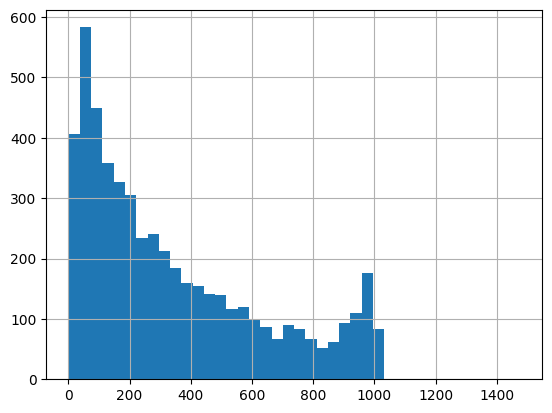

In [11]:
df['channel_description'].str.len().hist(bins=40)

–í–∏–¥–Ω–æ, —á—Ç–æ –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –æ–ø–∏—Å–∞–Ω–∏–π –≤–∏–¥–µ–æ –∏–º–µ–µ—Ç –º–∞–ª—É—é –¥–ª–∏–Ω—É (–º–µ–Ω–µ–µ 100 —Å–∏–º–≤–æ–ª–æ–≤), –ø–ª—é—Å –±–æ–ª—å—à–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ–ø–∏—Å–∞–Ω–∏—è –Ω–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–µ–Ω –∏–ª–∏ —è–≤–ª—è–µ—Ç—Å—è —Å—Å—ã–ª–∫–æ–π –Ω–∞ —Å–æ—Ü —Å–µ—Ç–∏.  
–ü–æ —Ç–∞–∫–∏—Å –¥–∞–Ω–Ω—ã–º, —Å–ª–æ–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª—è—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∏.
–ö–∞–∫ –¥–∞–ª–µ–µ –ø–æ–∫–∞–∑–∞–ª–∏ –ø–æ–ø—ã—Ç–∫–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ –≤—ã—à–µ 0.52 F1-macro –ø–æ–ª—É—á–∏—Ç—å –Ω–µ —É–¥–∞–ª–æ—Å—å.

<Axes: >

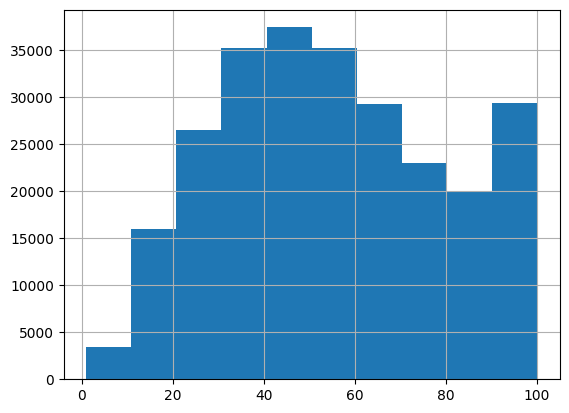

In [12]:
df.explode('video_titles')['video_titles'].str.len().hist()

–ï—Å–ª–∏ –≤–∑—è—Ç—å –≤—Å–µ –Ω–∞–∑–≤–∞–Ω–∏—è –∫ –≤–∏–¥–µ–æ, –≤–Ω–µ –ø—Ä–∏–≤—è–∑–∫–∏ –∫ –∫–∞–Ω–∞–ª–∞–º, —Ç–æ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –¥–ª–∏–Ω–Ω–∞ —Ç–µ–∫—Å—Ç–∞ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –æ–∫–æ–ª–æ 50 —Å–∏–º–≤–æ–ª–æ–≤.  
–≠—Ç–æ –Ω–µ —Ç–∞–∫ –º–Ω–æ–≥–æ, –Ω–æ –æ–∫–æ–ª–æ –Ω—É–ª–µ–≤—ã—Ö –¥–ª–∏–Ω –º–∞–ª–æ.  
–¢–∞–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã–≥–ª—è–¥–∏—Ç –ø–µ—Ä—Å–ø–µ–∫—Ç–∏–≤—ã–Ω—ã–º.  
–ü–ª—é—Å –≤ –Ω–∞–∑–≤–∞–Ω–∏—è—Ö –ø—ã—Ç–∞—é—Ç—Å—è –æ—Ç—Ä–∞–∑–∏—Ç—å —Å—É—Ç—å –≤–∏–¥–µ–æ, —á—Ç–æ –¥–∞–ª–µ–∫–æ –Ω–µ –≤—Å–µ–≥–æ –º–æ–∂–µ—Ç –æ—Ç—Ä–∞–∂–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏—é, –Ω–æ —É–∂–µ –±–ª–∏–∫–æ.  

<Axes: >

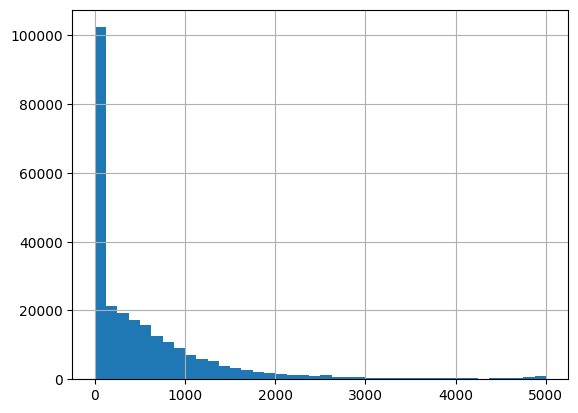

In [13]:
df.explode('video_descriptions')['video_descriptions'].str.len().hist(bins=40)

–û–ø–∏—Å–∞–Ω–∏–µ –∫ –≤–∏–¥–µ–æ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–≤–æ–µ–º –ø—É—Å—Ç–æ–µ. –ü–ª—é—Å –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ —ç—Ç–æ —Ä–µ–∫–ª–∞–º–∞ –∏ —Å—Å—ã–ª–∫–∏ –Ω–∞ —Å–æ—Ü—Å–µ—Ç–∏.  
–¢–∞–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –Ω–µ –ø–æ–¥–æ–π–¥—É—Ç –¥–ª—è –æ–±—É—á–µ–Ω–∏—è

#### –í—ã–≤–æ–¥  
–î–∞–ª–µ–µ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–∞–∑–≤–∞–Ω–∏ –∫ –≤–∏–¥–µ–æ –∏ –ø–æ–ø—ã—Ç–∞–µ–º—Å—è –∏—Ö –ø—Ä–∏ –∏—Ö –ø–æ–º–æ—â–∏ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä.  

### –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

#### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

* –û–±—ä–µ–¥–∏–Ω–∏–º —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ —Å –≤—ã–≥—Ä—É–∂–µ–Ω–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–π –æ –∫–∞–Ω–∞–ª–∞—Ö.  
* –°–¥–µ–ª–∞–µ–º —Å–ª–æ–≤–∞—Ä—å –∫–ª–∞—Å—Å–æ–≤ –¥–ª—è —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ –Ω–∞—à–µ–≥–æ —Ç–∞—Ä–≥–µ—Ç–∞.  
* –ê —Ç–∞–∫–∂–µ –æ—Ç—á–∏—Å—Ç–∏–º –æ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –≤–æ–∑–Ω–∏–∫–ª–∏ –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –ø—Ä–∏ –≤—ã–≥—Ä—É–∑–∫–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∫–∞–Ω–∞–ª—ã –Ω–µ –¥–æ—Å—Ç—É–ø–Ω—ã –∏–ª–∏ –∑–∞–±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω—ã.

In [14]:
df = df_topics.reset_index().merge(df, on='index', how='left')

In [15]:
target_dict = {}
for id, i in enumerate(sorted(df['topic_one'].unique())):
  target_dict[i] = id
print(target_dict)


{'?': 0, '–ê–≤—Ç–æ/–ú–æ—Ç–æ': 1, '–ò–≥—Ä—ã': 2, '–ö–∏–Ω–æ': 3, '–õ–∞–π—Ñ—Å—Ç–∞–π–ª': 4, '–ú—É–∑—ã–∫–∞': 5, '–†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è': 6, '–°–ø–æ—Ä—Ç': 7, '–£–≤–ª–µ—á–µ–Ω–∏–µ –∏ —Ö–æ–±–±–∏': 8, '–≠–∑–æ—Ç–µ—Ä–∏–∫–∞': 9, '–Æ–º–æ—Ä': 10}


In [16]:
df['topic_one'].value_counts()

–†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è          500
–Æ–º–æ—Ä                 500
–ö–∏–Ω–æ                 500
–ò–≥—Ä—ã                 500
–ê–≤—Ç–æ/–ú–æ—Ç–æ            500
–ú—É–∑—ã–∫–∞               500
–£–≤–ª–µ—á–µ–Ω–∏–µ –∏ —Ö–æ–±–±–∏    500
–õ–∞–π—Ñ—Å—Ç–∞–π–ª            500
–≠–∑–æ—Ç–µ—Ä–∏–∫–∞            500
–°–ø–æ—Ä—Ç                500
?                    500
Name: topic_one, dtype: int64

In [17]:
df['target_token'] = df['topic_one'].apply(lambda x: target_dict[x])

In [18]:
df['target_token'].value_counts()

6     500
10    500
3     500
2     500
1     500
5     500
8     500
4     500
9     500
7     500
0     500
Name: target_token, dtype: int64

In [19]:
df.head()

index                                                url  \
0      0  http://www.youtube.com/channel/UC2tsySbe9TNrI-...   
1      1  http://www.youtube.com/channel/UCdKuE7a2QZeHPh...   
2      2  http://www.youtube.com/channel/UCE7f6y9VGVdZEt...   
3      3  http://www.youtube.com/channel/UC6JRrn_7Qe1CZB...   
4      4  http://www.youtube.com/channel/UC7VUPJfRyt57Xo...   

               topic    topic_one  \
0  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è, –Æ–º–æ—Ä  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
1         –Æ–º–æ—Ä, –ò–≥—Ä—ã         –Æ–º–æ—Ä   
2               –Æ–º–æ—Ä         –Æ–º–æ—Ä   
3        –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
4               –ö–∏–Ω–æ         –ö–∏–Ω–æ   

                                 channel_description  \
0  –ö–∞–Ω–∞–ª –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –ê4, –ø–æ—á–µ–º—É —Ç–∞–∫? –¢–µ–±–µ –Ω—É–∂–Ω–æ –∑–∞...   
1  –ó–¥–µ—Å—å –º–æ–∂–Ω–æ –ø–æ—Ä–∂–∞—Ç—å, –æ—Ç–ª–æ–∂–∏—Ç—å –∫–∏—Ä–ø–∏—á–µ–π, —Å–Ω—è—Ç—å ...   
2                     –í—Å–µ–º —Å–ø–∞—Å–∏–±–æ –∑–∞ –ø–æ–¥–ø–∏—Å–∫—É‚ù§Ô∏è\n\n   
3  –Ø –Ω–µ –∑–Ω–∞—é, –∑–∞—á–µ–º —Å–æ–∑–¥–∞–ª —ç—Ç–æ—Ç –∫–∞–Ω–∞–ª, –Ω–æ –æ–Ω –≤—Ä–æ–¥...   
4  ‚ùå–°–∞–º—ã–π –º–æ–ª–æ–¥–æ–π —Ä–µ–∂–∏—Å—Å—ë—Ä —Å—Ç—Ä–∞–Ω—ã‚ùå\n–°–Ω–∏–º–∞—é —Ñ–∏–ª—å–º—ã...   

                                        video_titles  \
0  [24 –ß–∞—Å–∞ –≤ –ò–ì–õ–£ ! * –í–´–ñ–ò–í–ê–ù–ò–ï 1 –ß–ê–° –í–õ–û–ì *, –≠–∫...   
1  [–û–ì–†–û–ú–ù–ê–Ø –ó–ú–ï–Æ–ö–ê ‚ñ∫ Resident Evil HD Remaster #...   
2  [–ò–î–ï–ê–õ–¨–ù–ê–Ø –®–ö–û–õ–ê (—Å–º–µ—à–Ω–æ–µ –≤–∏–¥–µ–æ, –ø—Ä–∏–∫–æ–ª—ã, —é–º–æ—Ä...   
3  [–°–∞–º—ã–π –í–µ–∑—É—á–∏–π –í—ã–∏–≥—Ä–∞–µ—Ç 200.000! (–ì–æ—Ä–∏–ª–ª–∞, –ö–æ—Ä...   
4  [‚ùå–î–µ—Ç–∏ —Å–æ–≤—Å–µ–º —Å —É–º–∞ —Å–æ—à–ª–∏ —Å–æ ¬´–°–ª–æ–≤–∞ –ø–∞—Ü–∞–Ω–∞¬ª  #...   

                                  video_descriptions  \
0  [–û—Ñ–∏—Ü–∏–∞–ª—å–Ω—ã–π –º–µ—Ä—á –ê4 : https://a4shop.ru\n\n–ú—ã...   
1  [–ü—Ä–æ—Ö–æ–∂–¥–µ–Ω–∏–µ Resident Evil HD Remaster. –í—Å–µ–º –ø...   
2  [, , , , , , , , , , , , , , , , , , , , , , ,...   
3  [–ì–æ—Ä—ã –∫—ç—à–±—ç–∫–∞ —Å Tinkoff Premium ‚Äî https://l.ti...   
4  [, , , –°–ï–†–ò–ê–õ –£–ñ–ï –í–´–®–ï–õ. –°–ú–û–¢–†–ò–¢–ï –ï–ì–û –ó–î–ï–°–¨: h...   

                                           video_ids  \
0  [OH2s8vQAWug, zzc4oXazwrg, HPcp0TOhZRo, yLftCk...   
1  [A98M-aUIgXI, vGDjLQDHPxw, CXiCyvBYtzA, Mx6_vS...   
2  [e6vFQn0Oegs, Sb5iouUNKw4, -FnQETxkvNs, pF9zuj...   
3  [PnLS-kbwbog, ygkDbP3wz9U, X7a7VNC-ZmM, rbKpcX...   
4  [HJVY8QscD7E, iaZaxLWQMek, KnKOsdZxYs4, eUUMNx...   

                                video_published_time  target_token  
0  [2024-01-31T12:01:30Z, 2024-01-29T12:01:02Z, 2...             6  
1  [2024-01-30T15:00:07Z, 2024-01-29T15:01:00Z, 2...            10  
2  [2024-01-30T13:00:36Z, 2024-01-28T13:00:24Z, 2...            10  
3  [2024-01-31T17:39:26Z, 2024-01-13T15:09:39Z, 2...             6  
4  [2023-12-27T14:39:30Z, 2023-12-20T16:12:07Z, 2...             3

In [20]:
df['video_titles'].isna().sum()

207

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500 entries, 0 to 5499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 5500 non-null   int64 
 1   url                   5500 non-null   object
 2   topic                 5500 non-null   object
 3   topic_one             5500 non-null   object
 4   channel_description   5198 non-null   object
 5   video_titles          5293 non-null   object
 6   video_descriptions    5293 non-null   object
 7   video_ids             5293 non-null   object
 8   video_published_time  5293 non-null   object
 9   target_token          5500 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 472.7+ KB


In [22]:
df = df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5198 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 5198 non-null   int64 
 1   url                   5198 non-null   object
 2   topic                 5198 non-null   object
 3   topic_one             5198 non-null   object
 4   channel_description   5198 non-null   object
 5   video_titles          5198 non-null   object
 6   video_descriptions    5198 non-null   object
 7   video_ids             5198 non-null   object
 8   video_published_time  5198 non-null   object
 9   target_token          5198 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 446.7+ KB


#### –£–¥–∞–ª–µ–Ω–∏–µ "–º—É—Å–æ—Ä–∞" –∏–∑ —Ç–µ–∫—Å—Ç–∞  
–£–¥–∞–ª–∏–º –≤—Å–µ —Å–∏–º–≤–æ–ª—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –±—É–∫–≤–æ–π.  
–£–¥–∞–ª–∏–º –≤—Å–µ —Å–∏–º–≤–æ–ª—ã –∫–æ–Ω—Ç—Ä–æ–ª—è.  


In [24]:
def remove_accented_chars(sentence):
  t = []
  for x in sentence:
    # –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ 'NFKC' –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞
    x = unicodedata.normalize('NFKC', x)

    # –£–¥–∞–ª–∏—Ç–µ —Å–∏–º–≤–æ–ª—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –±—É–∫–≤–∞–º–∏ —Ä—É—Å—Å–∫–æ–≥–æ –∞–ª—Ñ–∞–≤–∏—Ç–∞
    x = ''.join(char for char in x if char.isalpha() or char.isspace())
    t.append(x)
  return t

def remove_control_characters(sentence):
    t = []
    for x in sentence:
        pattern = re.compile(r'[\n\t\r\\\'\"]')
        cleaned_text = re.sub(pattern, ' ', x)
        t.append(cleaned_text)
    return t

–ü–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å TFIDF, BERT, FastText –∫ –Ω–∞—à–∏–º –¥–∞–Ω–Ω—ã–º –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

#### TFIDF —Å explode  

TFIDF —Ö–æ—Ä–æ—à–æ –ø–æ–¥—Ö–æ–¥–∏—Ç—Å—è –¥–ª—è —Ä–µ—à–µ–Ω–∏—è —Ç–∞–∫–æ–π –∑–∞–¥–∞—á–∏, —Ç.–∫. —Å–≤—è–∑–∞–Ω–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ —É –Ω–∞—Å –≤ –Ω–∞–∑–≤–∞–Ω–∏—è—Ö –º–∞–ª–æ, —Å–∞–º–∏ –æ–Ω–∏ –∫–æ—Ä–æ—Ç–∫–∏–µ, —Å–ª–æ–≤–∞ —á–∞—Å—Ç–æ –ø—Ä–æ—Å—Ç–æ –ø–µ—Ä–µ—á–∏—Å–ª—è—é—Ç—Å—è.  
–û—Ü–µ–Ω–∏–≤–∞—Ç—å –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ —Ç–æ–π –∏–ª–∏ –∏–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –±—É–¥–µ—Ç —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–µ–µ –ø—Ä–æ—Å—Ç–æ –ø–æ –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö —Å–ª–æ–≤.  
–£ –Ω–∞—Å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–∞–Ω–∞–ª–∞ —Å–ø–∏—Å–∫–æ —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –≤–∏–¥–µ–æ. –ú—ã –º–æ–∂–µ–º –ª–∏–±–æ –∏—Ö –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –≤ –æ–¥–Ω—É —Å—Ç—Ä–æ–∫—É –∏ –æ—Ç–ø—Ä–∞–≤–∏—Ç—å –≤ –∞–ª–≥–æ—Ä–∏—Ç–º, –ª–∏–±–æ —Ä–∞–∑–≤–µ—Ä–Ω—É—Ç—å —Å–ø–∏—Å–∫–æ –∏ —Å–¥–µ–ª–∞—Ç—å –∫–∞–∂–¥–æ–µ –Ω–∞–∑–≤–∞–Ω–∏–µ —ç–∫–∑–µ–º–ø–ª—è—Ä–æ–º –∫–ª–∞—Å—Å–∞, –∫–æ—Ç–æ—Ä–æ–µ –ø—Ä–∏—Å–≤–æ–µ–Ω–æ –∫–∞–Ω–∞–ª—É.  
–ü–æ –∏–¥–µ–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π.

–û—Ç—á–∏—Å—Ç–∏–º –¥–∞–Ω–Ω—ã–µ –æ—Ç "–º—É—Å–æ—Ä–∞"

In [25]:
df['video_titles_clean'] = df['video_titles'].apply(remove_control_characters).apply(remove_accented_chars)

In [26]:
df['video_titles_clean'].head()

0    [ –ß–∞—Å–∞ –≤ –ò–ì–õ–£   –í–´–ñ–ò–í–ê–ù–ò–ï  –ß–ê–° –í–õ–û–ì , –≠–∫—Å—Ç—Ä–µ–º–∞...
1    [–û–ì–†–û–ú–ù–ê–Ø –ó–ú–ï–Æ–ö–ê  Resident Evil HD Remaster , ...
2    [–ò–î–ï–ê–õ–¨–ù–ê–Ø –®–ö–û–õ–ê —Å–º–µ—à–Ω–æ–µ –≤–∏–¥–µ–æ –ø—Ä–∏–∫–æ–ª—ã —é–º–æ—Ä –ø–æ...
3    [–°–∞–º—ã–π –í–µ–∑—É—á–∏–π –í—ã–∏–≥—Ä–∞–µ—Ç  –ì–æ—Ä–∏–ª–ª–∞ –ö–æ—Ä–µ—à –ö–æ—Ñ—Ñ–∏ –î...
4    [–î–µ—Ç–∏ —Å–æ–≤—Å–µ–º —Å —É–º–∞ —Å–æ—à–ª–∏ —Å–æ –°–ª–æ–≤–∞ –ø–∞—Ü–∞–Ω–∞  lost...
Name: video_titles_clean, dtype: object

In [27]:
df['video_titles']

0       [24 –ß–∞—Å–∞ –≤ –ò–ì–õ–£ ! * –í–´–ñ–ò–í–ê–ù–ò–ï 1 –ß–ê–° –í–õ–û–ì *, –≠–∫...
1       [–û–ì–†–û–ú–ù–ê–Ø –ó–ú–ï–Æ–ö–ê ‚ñ∫ Resident Evil HD Remaster #...
2       [–ò–î–ï–ê–õ–¨–ù–ê–Ø –®–ö–û–õ–ê (—Å–º–µ—à–Ω–æ–µ –≤–∏–¥–µ–æ, –ø—Ä–∏–∫–æ–ª—ã, —é–º–æ—Ä...
3       [–°–∞–º—ã–π –í–µ–∑—É—á–∏–π –í—ã–∏–≥—Ä–∞–µ—Ç 200.000! (–ì–æ—Ä–∏–ª–ª–∞, –ö–æ—Ä...
4       [‚ùå–î–µ—Ç–∏ —Å–æ–≤—Å–µ–º —Å —É–º–∞ —Å–æ—à–ª–∏ —Å–æ ¬´–°–ª–æ–≤–∞ –ø–∞—Ü–∞–Ω–∞¬ª  #...
                              ...                        
5492    [04 08 2023 –î–∏–ª–∏—ë—Ä & –ú–∞—Ö–ª–∏—è —á–∞—Å—Ç—å 2, 03 11 202...
5493    [#—Å—Ç–∞–Ω–¥–æ—Ñ—Ñ2 #best #standoff2 #–∏–≥—Ä—ã #–º—É–≤–∏–∫ #–¥–µ–º...
5495    [12 –∞–≤–≥—É—Å—Ç–∞ 2023 –≥., –¢–∞–∞–ª–∞–π –ö–æ–∂–æ–º–∫—É–ª–æ–≤: "–¢–æ–∫–æ–π...
5497    [–°–º–µ—à–Ω–æ–π –∞–Ω–µ–∫–¥–æ—Ç –≤ –º–∏—Ä–µ, –ê–Ω–µ–∫–¥–æ—Ç—ã —Å–∞–º—ã–µ, –°–∞–º—ã–π...
5498    [wild outdoor Growerz prod. –ê–£–¢ 2023. –§–∏–Ω–∞–ª—å–Ω–∞...
Name: video_titles, Length: 5198, dtype: object

–†–∞–∑–¥–µ–ª–∏–º –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É, —Å–¥–µ–ª–∞–µ–º –µ–µ —Å—Ç—Ä–∞—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–π, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ, —á—Ç–æ —É –Ω–∞—Å –≤—ã–±–æ—Ä–∫–∞ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–∞.

In [28]:
train, test, y_train, y_test = train_test_split(df['video_titles_clean'], df['target_token'], test_size=0.2, random_state=42, stratify=df['target_token'])

–°–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–º —Å —Ä–∞–∑–≤–µ—Ä–Ω—É—Ç—ã–º–∏ –∏–∑ —Å–ø–∏—Å–∫–æ–≤ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –≤–∏–¥–µ–æ

In [29]:
df_test = pd.DataFrame()
df_test['test'] = test
df_test['y_test'] = y_test

df_train = pd.DataFrame()
df_train['train'] = train
df_train['y_train'] = y_train

train = df_train.explode('train').reset_index()
test = df_test.explode('test').reset_index()

In [30]:
print('–ö–æ–ª-–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: ', len(train))
print()
train.head()


–ö–æ–ª-–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:  200798



index                                              train  y_train
0   3516                                    —é–ª—è—à–µ—Ä–µ–º–µ—Ç—å–µ–≤–∞         5
1   3516  –î—É—ç—Ç –Æ–ª—è –®–µ—Ä–µ–º–µ—Ç—å–µ–≤–∞ –≥—Ä –õ–µ–¥–∏ –∏ –°–µ—Ä–≥–µ–π –í–∞—Å—é—Ç–∞ –≥...        5
2   3516  –ó–∞ –∫—É–ª–∏—Å–∞–º–∏ –í–µ–≥–∞—Å –°–∏—Ç–∏ –•–æ–ª–ª —é–ª—è—à–µ—Ä–µ–º–µ—Ç—å–µ–≤–∞ –≥—Ä—É...        5
3   3516                 –Æ–ª—è –∏ —Ä—É—Å—Å–∫–∞—è –∑–∏–º–∞  —é–ª—è—à–µ—Ä–µ–º–µ—Ç—å–µ–≤–∞        5
4   3516  –†–∞—Å–∫—Ä—ã–≤–∞—é —Å–µ–∫—Ä–µ—Ç—ã –º–æ–µ–π —Ñ–æ—Ç–æ—Å–µ—Å—Å–∏–∏  —é–ª—è—à–µ—Ä–µ–º–µ—Ç—å–µ–≤–∞        5

In [31]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('russian'), ngram_range=(1,1))
X_train = tfidf.fit_transform(train['train'])
X_test = tfidf.transform(test['test'])

In [32]:
X_train

<200798x163948 sparse matrix of type '<class 'numpy.float64'>'
	with 1195533 stored elements in Compressed Sparse Row format>

In [33]:
model = LogisticRegression(solver='sag', class_weight='balanced')

In [34]:
model.fit(X_train, train['y_train'])

LogisticRegression(class_weight='balanced', solver='sag')

In [35]:
y_pred = model.predict(X_test)
test['y_pred'] = y_pred

"–ó–∞–≤–µ—Ä–Ω–µ–º" –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã –≤–∏–¥–µ–æ –æ–±—Ä–∞—Ç–Ω–æ –≤ –∫–∞–Ω–∞–ª—ã –∏ –ø—Ä–∏—Å–≤–æ–∏–º –∫–∞–Ω–∞–ª—É —Ç–æ—Ç –∫–ª–∞—Å—Å, –∫–æ—Ç–æ—Ä–æ–≥–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ.

In [36]:
 test_data_modefied = test.groupby('index')['y_pred', 'y_test'].agg(lambda x: np.bincount(x).argmax())

<ipython-input-36-630ea2e71c51>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_data_modefied = test.groupby('index')['y_pred', 'y_test'].agg(lambda x: np.bincount(x).argmax())


–ö–ª–∞—Å—Å—ã –ø—Ä–∏—Å–≤–æ–µ–Ω–Ω—ã–µ –∫–∞–∂–¥–æ–º—É –∫–∞–Ω–∞–ª—É –ø–æ —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º –∫–ª–∞—Å—Å–∞ –≤—Ö–æ–¥—è—â–∏—Ö –≤–∏–¥–µ–æ
              precision    recall  f1-score   support

           0       0.48      0.32      0.38        63
           1       0.86      0.94      0.90        98
           2       0.77      0.88      0.82        98
           3       0.71      0.68      0.70        96
           4       0.44      0.59      0.50        97
           5       0.83      0.78      0.80        98
           6       0.36      0.28      0.31        96
           7       0.93      0.96      0.94        97
           8       0.81      0.83      0.82       100
           9       0.84      0.94      0.89       100
          10       0.67      0.52      0.58        97

    accuracy                           0.71      1040
   macro avg       0.70      0.70      0.69      1040
weighted avg       0.71      0.71      0.71      1040



<Axes: >

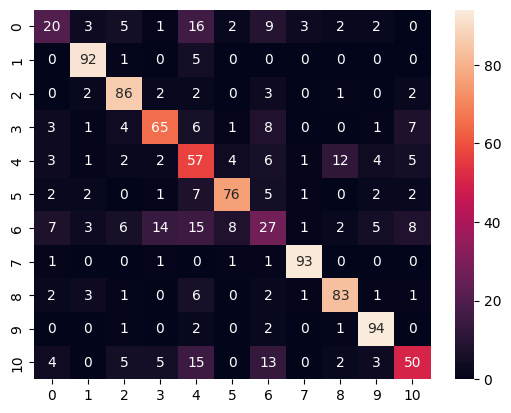

In [37]:
print('–ö–ª–∞—Å—Å—ã –ø—Ä–∏—Å–≤–æ–µ–Ω–Ω—ã–µ –∫–∞–∂–¥–æ–º—É –∫–∞–Ω–∞–ª—É –ø–æ —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º –∫–ª–∞—Å—Å–∞ –≤—Ö–æ–¥—è—â–∏—Ö –≤–∏–¥–µ–æ')
print(classification_report(test_data_modefied['y_test'], test_data_modefied['y_pred'], zero_division=0))
sns.heatmap(confusion_matrix(test_data_modefied['y_test'], test_data_modefied['y_pred']), annot=True)


–ö–ª–∞—Å—Å—ã –ø—Ä–∏—Å–≤–æ–µ–Ω–Ω–æ–º—É –∫–∞–∂–¥–æ–º—É –≤–∏–¥–µ–æ –±–µ–∑ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –ø–æ –∫–∞–Ω–∞–ª–∞–º
              precision    recall  f1-score   support

           0       0.26      0.27      0.26      2748
           1       0.71      0.73      0.72      4866
           2       0.69      0.68      0.68      4667
           3       0.60      0.54      0.57      4642
           4       0.34      0.45      0.39      4794
           5       0.65      0.54      0.59      4756
           6       0.25      0.23      0.24      4767
           7       0.72      0.74      0.73      4711
           8       0.62      0.66      0.64      4966
           9       0.71      0.75      0.73      4873
          10       0.48      0.40      0.43      4661

    accuracy                           0.56     50451
   macro avg       0.55      0.54      0.54     50451
weighted avg       0.56      0.56      0.56     50451



<Axes: >

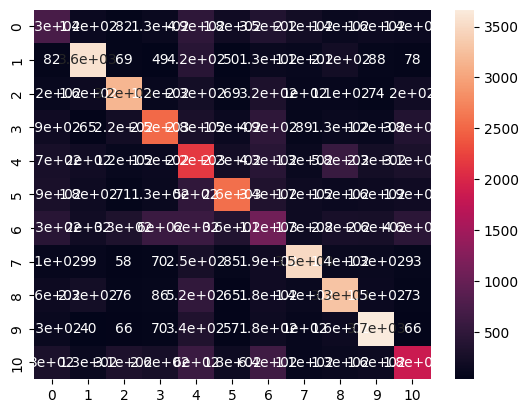

In [38]:
print('–ö–ª–∞—Å—Å—ã –ø—Ä–∏—Å–≤–æ–µ–Ω–Ω–æ–º—É –∫–∞–∂–¥–æ–º—É –≤–∏–¥–µ–æ –±–µ–∑ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –ø–æ –∫–∞–Ω–∞–ª–∞–º')
print(classification_report(test['y_test'], y_pred, zero_division=0))
sns.heatmap(confusion_matrix(test['y_test'], y_pred), annot=True)


–ü–æ –æ—Ç–¥–µ–ª—å–Ω—ã–º –≤–∏–¥–µ–æ –≤–∏–¥–Ω–æ,—á—Ç–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Ä–∞–±–æ—Ç–∞–µ—Ç —Ö—É–∂–µ, –Ω–æ –∫–∞–∫ –≤–∏–¥–Ω–æ –±—ã–ª–æ —Ä–∞–Ω–µ–µ, –ø–æ—Å–ª–µ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –º–µ—Ç—Ä–∏–∫–∞ –ø–æ–¥—Ä–∞—Å—Ç–∞–µ—Ç

–ö—Ä–æ—Å—Å –≤–∞–ª–∏–¥–∞—Ü–∏—é —Ç—É—Ç –ø—Ä–æ–≤–æ–¥–∏—Ç—å –Ω–µ –±—É–¥–µ–º, —Ç.–∫. —Ç—É—Ç –Ω–∞–¥–æ –∞–∫–∫—É—Ä–∞—Ç–Ω–Ω–æ –¥–µ–ª–∏—Ç—å –≤—ã–±–æ—Ä–∫—É, —Ç.–∫. –≤–∏–¥–µ–æ –∏–∑ –æ–¥–Ω–æ–≥–æ –∫–∞–Ω–∞–ª–∞ –Ω—É–∂–Ω–æ –¥–µ—Ä–∂–∞—Ç—å –≤–º–µ—Å—Ç–µ.  
–°–¥–µ–ª–∞–µ–º —Å–ª–µ–¥—É—é—â–µ–º —ç—Ç–∞–ø–µ  

#### TFIDF –±–µ–∑ explode

–ê —Ç–µ–ø–µ—Ä—å –ø—Ä–æ—Å—Ç–æ —Å–æ–µ–¥–∏–Ω–∏–º–∏ –Ω–∞—à–∏ –Ω–∞–∑–≤–∞–Ω–∏—è –≤ –æ–¥–Ω—É —Å—Ç—Ä–æ–∫—É –∏ –ø–µ—Ä–µ–¥–∞–¥–º–∏ TFIDF

In [39]:
df['video_titles'].apply(lambda x: ''.join(x))

0       24 –ß–∞—Å–∞ –≤ –ò–ì–õ–£ ! * –í–´–ñ–ò–í–ê–ù–ò–ï 1 –ß–ê–° –í–õ–û–ì *–≠–∫—Å—Ç—Ä...
1       –û–ì–†–û–ú–ù–ê–Ø –ó–ú–ï–Æ–ö–ê ‚ñ∫ Resident Evil HD Remaster #3...
2       –ò–î–ï–ê–õ–¨–ù–ê–Ø –®–ö–û–õ–ê (—Å–º–µ—à–Ω–æ–µ –≤–∏–¥–µ–æ, –ø—Ä–∏–∫–æ–ª—ã, —é–º–æ—Ä,...
3       –°–∞–º—ã–π –í–µ–∑—É—á–∏–π –í—ã–∏–≥—Ä–∞–µ—Ç 200.000! (–ì–æ—Ä–∏–ª–ª–∞, –ö–æ—Ä–µ...
4       ‚ùå–î–µ—Ç–∏ —Å–æ–≤—Å–µ–º —Å —É–º–∞ —Å–æ—à–ª–∏ —Å–æ ¬´–°–ª–æ–≤–∞ –ø–∞—Ü–∞–Ω–∞¬ª  #l...
                              ...                        
5492    04 08 2023 –î–∏–ª–∏—ë—Ä & –ú–∞—Ö–ª–∏—è —á–∞—Å—Ç—å 203 11 2023 6...
5493    #—Å—Ç–∞–Ω–¥–æ—Ñ—Ñ2 #best #standoff2 #–∏–≥—Ä—ã #–º—É–≤–∏–∫ #–¥–µ–º–∫...
5495    12 –∞–≤–≥—É—Å—Ç–∞ 2023 –≥.–¢–∞–∞–ª–∞–π –ö–æ–∂–æ–º–∫—É–ª–æ–≤: "–¢–æ–∫–æ–π—á—É ...
5497    –°–º–µ—à–Ω–æ–π –∞–Ω–µ–∫–¥–æ—Ç –≤ –º–∏—Ä–µ–ê–Ω–µ–∫–¥–æ—Ç—ã —Å–∞–º—ã–µ–°–∞–º—ã–π —Å–º–µ—à...
5498    wild outdoor Growerz prod. –ê–£–¢ 2023. –§–∏–Ω–∞–ª—å–Ω–∞—è...
Name: video_titles, Length: 5198, dtype: object

In [40]:
train, test, y_train, y_test = train_test_split(df['video_titles_clean'].apply(lambda x: ''.join(x)), df['target_token'], test_size=0.2, random_state=42, stratify=df['target_token'])

In [41]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('russian'), ngram_range=(1,1))
X_train = tfidf.fit_transform(train)
X_test = tfidf.transform(test)

In [42]:
X_train

<4158x269859 sparse matrix of type '<class 'numpy.float64'>'
	with 649219 stored elements in Compressed Sparse Row format>

In [43]:
model = LogisticRegression(solver='sag', class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='sag')

In [44]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.48      0.41      0.44        63
           1       0.92      0.90      0.91        98
           2       0.77      0.86      0.81        98
           3       0.71      0.72      0.72        96
           4       0.50      0.54      0.52        97
           5       0.75      0.82      0.78        98
           6       0.33      0.34      0.34        96
           7       0.87      0.95      0.91        97
           8       0.85      0.82      0.83       100
           9       0.86      0.89      0.88       100
          10       0.63      0.44      0.52        97

    accuracy                           0.71      1040
   macro avg       0.70      0.70      0.70      1040
weighted avg       0.71      0.71      0.71      1040



<Axes: >

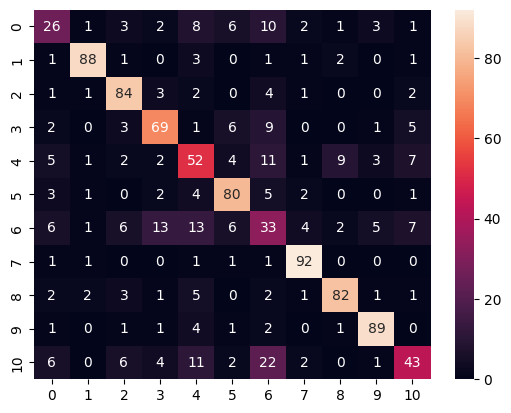

In [45]:
print(classification_report(y_test, y_pred, zero_division=0))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

##### –ü—Ä–æ–≤–µ–¥–µ–º –∫—Ä–æ—Å—Å–≤–∞–ª–∏–¥–∞—Ü–∏—é, –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏.

In [46]:

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train.to_list(), cv=stratified_kfold, scoring='f1_macro')

In [47]:
scores

array([0.70954516, 0.68275346, 0.69041747, 0.6551556 , 0.69199279,
       0.69080296, 0.67640487, 0.67431927, 0.66141599, 0.7067916 ])

–ö–∞–∫ –≤–∏–¥–∏–º, —Ä–∞–∑–±—Ä–æ—Å F1 –Ω–µ –±–æ–ª—å—à–æ–π, –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç —Å—Ç–∞–±–∏–ª—å–Ω–æ –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö.

#### TFIDF description channal

–î–ª—è –∏–Ω—Ç–µ—Ä–µ—Å–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –Ω–∞–º –¥–∞—Å—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –ø–æ –æ–ø–∏—Å–∞–Ω–∏—é –∫–∞–Ω–∞–ª–æ–≤. –ö–∞–∑–∞–ª–æ—Å—å –±—ã —ç—Ç–æ –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å —Å–∞–º—ã–π –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–π –∏—Å—Ç–æ—á–Ω–∏–∫, –∏—Å—Ö–æ–¥—è –∏–∑ –µ–≥–æ –Ω–∞–∑–≤–∞–Ω–∏—è.

In [48]:
train, test, y_train, y_test = train_test_split(df['channel_description'], df['target_token'], test_size=0.2, random_state=42, stratify=df['target_token'])

In [49]:
train

3516    –ü—Ä–∏–≤–µ—Ç! –Ø –ø–µ–≤–∏—Ü–∞ –Æ–ª–∏—è –®–µ—Ä–µ–º–µ—Ç—å–µ–≤–∞\n–î–æ–±—Ä–æ –ø–æ–∂–∞–ª...
4079    –ü–æ –≤–æ–ø—Ä–æ—Å—É –ª–∏—á–Ω–æ–π –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–∏ WhatsApp +79870...
3700                                   –ó–∞ –ø–æ–¥–ø–∏—Å–∫—É –º—è—É–∫–∞—é
2129    –î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –Ω–∞ –Ω–∞—à –∫–∞–Ω–∞–ª. –ù–∞—Å –∑–æ–≤—É—Ç –ö—Ä–∏—Å—Ç...
1252    –ü—Ä–∏–≤–µ—Ç) –ú–µ–Ω—è –∑–æ–≤—É—Ç –ê–ª—ë–Ω–∞, –º–æ–∂–µ—à—å –Ω–∞–∑—ã–≤–∞—Ç—å –º–µ–Ω—è...
                              ...                        
590     https://vk.com/realpepperofficial - –ú–æ–π –ø–∞–±–ª–∏–∫...
1990    –ë–ª–æ–≥ –æ —É–±–æ—Ä–∫–µ, –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ —Ö—Ä–∞–Ω–µ–Ω–∏—è –∏ –∫–ª–∞—Å—Å–Ω—ã—Ö...
2080    –ü–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å —Ñ–∏–≥—É—Ä–Ω–æ–≥–æ –∫–∞—Ç–∞–Ω–∏—è –≤ –†–æ—Å—Å–∏–∏ –≤ –ø–æ—Å–ª...
446     –ï—Å–ª–∏ –°–º–æ–≥ –ü—Ä–æ—á–∏—Ç–∞—Ç—å - –ü–æ–¥–ø–∏—à–∏—Å—å üíïüó°Ô∏è\n\n–°–æ—Ç—Ä—É–¥–Ω...
2925    –ú–µ–Ω—è –ó–æ–≤—É—Ç –ê–Ω—Ç–æ–Ω)\n–í—Å—ë –µ—â—ë –ª—É—á—à–∏–µ –ø–∏–≤–Ω—ã–µ –æ–±–∑–æ—Ä...
Name: channel_description, Length: 4158

In [50]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('russian'), ngram_range=(1,1))
X_train = tfidf.fit_transform(train)
X_test = tfidf.transform(test)

In [51]:
X_train

<4158x38785 sparse matrix of type '<class 'numpy.float64'>'
	with 134755 stored elements in Compressed Sparse Row format>

In [52]:
model = LogisticRegression(solver='sag', class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='sag')

In [53]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.21      0.24      0.22        63
           1       0.62      0.61      0.62        98
           2       0.56      0.65      0.60        98
           3       0.59      0.56      0.58        96
           4       0.45      0.45      0.45        97
           5       0.69      0.59      0.64        98
           6       0.28      0.28      0.28        96
           7       0.69      0.60      0.64        97
           8       0.62      0.66      0.64       100
           9       0.71      0.78      0.74       100
          10       0.47      0.42      0.44        97

    accuracy                           0.54      1040
   macro avg       0.54      0.53      0.53      1040
weighted avg       0.55      0.54      0.54      1040



<Axes: >

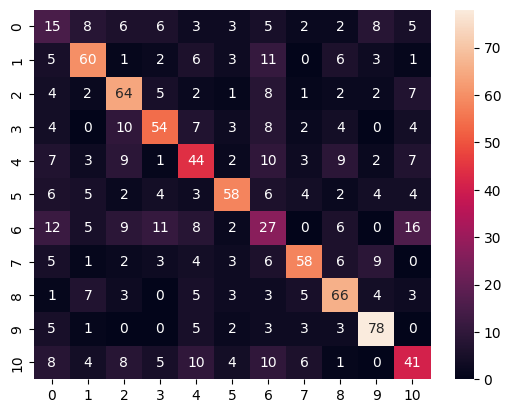

In [54]:
print(classification_report(y_test, y_pred, zero_division=0))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### –í—ã–≤–æ–¥  
–û–±—É—á–∏–ª–∏ 3 —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–∏ TFIDF.  
–í —Ü–µ–ª–æ–º –ª—É—á—à–µ –≤—Å–µ–≥–æ –ø—Ä–æ—Å—Ç–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –Ω–∞–∑–≤–∞–Ω–∏—è –≤–∏–¥–µ–æ –≤ –æ–¥–Ω–æ –∏ –Ω–∞ –Ω–µ–º –æ–±—É—á–∞—Ç—å TFIDF.  F1 = 0.7 —ç—Ç–æ –Ω–µ —Ç–∞–∫ –ø–ª–æ—Ö–æ, –Ω–æ —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –ª—É—á—à–µ.  
–≠–∫—Å–ø–µ—Ä–µ–º–µ–Ω—Ç —Å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–µ–π –ø–æ –æ–ø–∏—Å–∞–Ω–∏—è–º –∫–∞–Ω–∞–ª–æ–≤ –Ω–µ —É–¥–∞–ª—Å—è, F1 = 0.5, —á—Ç–æ –æ—á–µ–Ω—å –º–∞–ª–æ.  
–û—Å—Ç–∞–µ—Ç—Å—è —É—á–∏—Ç—å—Å—è –∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ –Ω–∞ –Ω–∞–∑–≤–∞–Ω–∏—è—Ö –≤–∏–¥–µ–æ.

#BERT

In [55]:
def f1_score_func_m(preds, labels, average='binary'):
    """
    –í—ã—á–∏—Å–ª—è–µ—Ç F1-–º–µ—Ä—É –¥–ª—è –º–Ω–æ–≥–æ–∫–ª–∞—Å—Å–æ–≤–æ–π –∏–ª–∏ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - preds: numpy array, –ø—Ä–æ–≥–Ω–æ–∑—ã –º–æ–¥–µ–ª–∏
    - labels: numpy array, –∏—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏
    - average: —Å—Ç—Ä–æ–∫–∞, –æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä, –∑–∞–¥–∞—é—â–∏–π —Ç–∏–ø —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 'binary')

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - f1_score: float, F1-–º–µ—Ä–∞
    """

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    f1 = f1_score(labels_flat, preds_flat, average=average)

    return f1

In [56]:
if torch.cuda.is_available() == True:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [57]:
train, test, y_train, y_test = train_test_split(df['video_titles'], df['target_token'], test_size=0.2, random_state=42, stratify=df['target_token'])

In [58]:
df_test = pd.DataFrame()
df_test['test'] = test
df_test['y_test'] = y_test

df_train = pd.DataFrame()
df_train['train'] = train
df_train['y_train'] = y_train

train = df_train.explode('train').reset_index()
test = df_test.explode('test').reset_index()

In [59]:
HF = 'DeepPavlov/rubert-base-cased'

In [60]:
tokenizer = AutoTokenizer.from_pretrained(HF, do_lower_case=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [61]:
encoded_data_train = tokenizer.batch_encode_plus(
    train['train'].to_list(),
    padding=True,
    truncation=True,
    add_special_tokens=True,
    return_attention_mask=True,
    return_tensors='pt',
    max_length=512


)

encoded_data_test = tokenizer.batch_encode_plus(
    test['test'].to_list(),
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    return_tensors='pt',
    max_length=512,
    truncation=True
)

In [62]:
  train_seq = encoded_data_train['input_ids']
  train_mask = encoded_data_train['attention_mask']
  train_y = torch.tensor(train['y_train'].tolist())


  test_seq = encoded_data_test['input_ids']
  test_mask = encoded_data_test['attention_mask']
  test_y = torch.tensor(test['y_test'].tolist())

In [63]:
  batch_size = 3000
  train_data = TensorDataset(train_seq, train_mask, train_y)
  train_sampler = RandomSampler(train_data)
  train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = batch_size)

  test_data =  TensorDataset(test_seq, test_mask, test_y)
  test_sampler = SequentialSampler(test_data)
  test_dataloader = DataLoader(test_data, sampler = test_sampler, batch_size = batch_size)


In [64]:
# —Å–±–æ—Ä –∏ –æ—Ç—á–∏—Å—Ç–∫–∞ –º—É—Å–æ—Ä–∞ –ø–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º
import gc
gc.collect()
torch.cuda.empty_cache()

In [65]:
model = AutoModelForSequenceClassification.from_pretrained(HF, num_labels=len(set(y_train)), ignore_mismatched_sizes=True)
model.to(device)

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [66]:
epochs = 100

optimizer = AdamW(model.parameters(), lr=1e-5)

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=10, num_training_steps=total_steps)

criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


–í—ã–±–µ—Ä–µ–º —Å–ª–æ–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥–µ–º –æ–±—É—á–∞—Ç—å

In [67]:
for n,p in model.named_parameters():
  if 'classifier' in n:
    p.requires_grad = True
  else:
    p.requires_grad = False

–î–∞–Ω–Ω—ã–π –∫–æ–¥ –∑–∞–∫–æ–º–º–µ–Ω–∏—Ä–æ–≤–∞–Ω, —Ç.–∫. –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –¥–æ–ª–≥–æ.

In [68]:
# best_valid_loss = float('inf')
# train_losses = []
# valid_losses = []
# f_scores = []


# for epoch in range(epochs):

#     #train
#     model.train()
#     total_loss, total_accuracy = 0, 0
#     total_preds = []
#     for step, batch in tqdm(enumerate(train_dataloader), total = len(train_dataloader)):
#       batch = [r.to(device) for r in batch]
#       labels = batch[2].to(device)
#       output = {'input_ids': batch[0],'attention_mask' : batch[1]}

#       preds = model(**output)
#       preds = preds['logits']
#       loss = criterion(preds, labels)
#       total_loss += loss.item()

#       loss.backward()
#       #torch.nn.utils.clip_grad_norm_(model.parameters(), 1,0)
#       optimizer.step()
#       scheduler.step()
#       optimizer.zero_grad()
#       preds = preds.detach().cpu().numpy()
#       total_preds.append(preds)

#     avg_loss = total_loss / len(train_dataloader)
#     total_preds = np.concatenate(total_preds, axis = 0)

#     #eval
#     model.eval()

#     eval_total_loss, eval_total_accuracy = 0,0
#     eval_total_preds = []
#     eval_total_labels = []

#     for step, batch in tqdm(enumerate(test_dataloader), total = len(test_dataloader)):
#         batch = [t.to(device) for t in batch]
#         output = {'input_ids': batch[0],'attention_mask' : batch[1]}
#         labels = batch[2].to(device)

#         with torch.no_grad():
#             preds = model(**output)
#             preds = preds['logits']
#             loss = criterion(preds, labels)
#             eval_total_loss = total_loss + loss.item()
#             preds = preds.detach().cpu().numpy()
#             labels = labels.detach().cpu().numpy()
#             eval_total_preds.append(preds)
#             eval_total_labels.append(labels)
#     eval_avg_loss = eval_total_loss / len(test_dataloader)
#     eval_total_preds = np.concatenate(eval_total_preds, axis = 0)
#     eval_total_labels = np.concatenate(eval_total_labels, axis = 0)

#     #visual
#     clear_output(True)

#     if epoch % 10 == 0:
#       print(classification_report(eval_total_labels, np.argmax(eval_total_preds, axis=1).flatten(), zero_division=0))

#     if eval_avg_loss < best_valid_loss:
#         best_valid_loss = eval_avg_loss
#         torch.save(model.state_dict(), f'bert_{epoch}')

#     train_losses.append(avg_loss)
#     valid_losses.append(eval_avg_loss)
#     score = f1_score_func_m(eval_total_preds, eval_total_labels, average='macro')
#     f_scores.append(score)

#     print(f'\nTraining loss: {avg_loss:.3f}')
#     print(f'Validation loss: {eval_avg_loss:.3f}')
#     print(score)

#     plt.plot(train_losses, label='train')
#     plt.plot(valid_losses, label='valid')
#     plt.plot(f_scores, label='f_score')
#     plt.legend()
#     plt.show()


–ë—ã–ª–∏ –ø—Ä–µ–¥–ø—Ä–∏–Ω—è—Ç—ã —Ä—è–¥ –ø–æ–ø—ã—Ç–æ–∫ –¥–æ–æ–±—É—á–∏—Ç—å –±–µ—Ä—Ç, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≥–æ—Ç–æ–≤—ã–π, –Ω–æ –≤ –ª—É—á—à–µ–º —Å–ª—É—á–∞–µ F1 –±—ã–ª 0.6.  
–í–æ—Å–ø—Ä–æ–∏–∑–≤–µ—Å—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ –±–µ—Ä—Ç –¥–æ–ª–≥–æ –∏ —Ç–æ–ª–∫—É –Ω–µ—Ç, –ø–æ—ç—Ç–æ–º—É –ø—Ä–æ—Å—Ç–æ –∫–æ–¥ –æ—Å—Ç–∞–≤–ª—é.

FastText

In [69]:
train, test, y_train, y_test = train_test_split(df['video_titles'].apply(remove_accented_chars).apply(remove_control_characters), df['target_token'], test_size=0.2, random_state=42, stratify=df['target_token'])

In [70]:
df_test = pd.DataFrame()
df_test['test'] = test
df_test['y_test'] = y_test

df_train = pd.DataFrame()
df_train['train'] = train
df_train['y_train'] = y_train

train = df_train.explode('train').reset_index()
test = df_test.explode('test').reset_index()

train['train'] = train['train'].str.lower()
test['test'] = test['test'].str.lower()

In [71]:
train['video_titles_w_tokens'] = train.apply(lambda x: f'__label__' + str(x['y_train']) + ' ' + x['train'], axis=1)

In [72]:
with open('training_data.txt', 'w', encoding='utf-8') as file:
  for text in train['video_titles_w_tokens']:
    file.write(text)


In [73]:
test.head()

index                                               test  y_test
0   1322  –∞—Å–º—Ä –æ–±–∑–æ—Ä –Ω–∞–±–æ—Ä–∞ lego batman   —á–∞—Å—Ç—å –Ω–∞–±–æ—Ä —Å ...       0
1   1322   –∞—Å–º—Ä –ø–µ–¥–∏–∞—Ç—Ä –ø—Ä–æ–≤–µ–¥–µ—Ç –ø–æ–ª–Ω—ã–π –º–µ–¥–∏—Ü–∏–Ω—Å–∫–∏–π –æ—Å–º–æ—Ç—Ä        0
2   1322                                               –∞—Å–º—Ä       0
3   1322                                  –∞—Å–º—Ä –Ω–æ—á–Ω–æ–π —Å—Ç—Ä–∏–º       0
4   1322  –∑–∞ –∫–∞–∫—É—é —Å—É–º–º—É —Å–¥–µ–ª–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–π —Ç—Ä–∏–≥–≥–µ—Ä  asmr...       0

In [74]:
# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = fasttext.train_supervised(input='training_data.txt',dim=150, ws=5, epoch=15, lr=0.01, minCount=5)

# –ü—Ä–∏–º–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∫–ª–∞—Å—Å–∞
prediction = model.predict(test['test'].to_list())

print(len(prediction[0]))
pred = [int(i[0].split('__')[-1]) if i else 0 for i in prediction[0]]

50451


              precision    recall  f1-score   support

           0       0.07      0.27      0.10      2748
           1       0.00      0.00      0.00      4866
           2       0.00      0.00      0.00      4667
           3       0.10      0.05      0.07      4642
           4       0.00      0.00      0.00      4794
           5       0.00      0.00      0.00      4756
           6       0.00      0.00      0.00      4767
           7       0.00      0.00      0.00      4711
           8       0.00      0.00      0.00      4966
           9       0.11      0.74      0.19      4873
          10       0.11      0.07      0.09      4661

    accuracy                           0.10     50451
   macro avg       0.03      0.10      0.04     50451
weighted avg       0.03      0.10      0.04     50451



<Axes: >

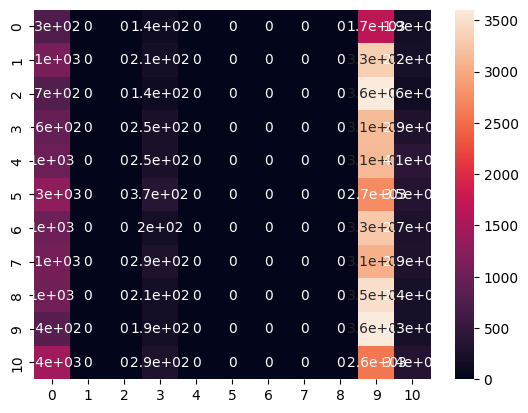

In [75]:
print(classification_report(test['y_test'].to_list(), pred, zero_division=0))
sns.heatmap(confusion_matrix(test['y_test'].to_list(), pred), annot=True)

FastText –≤–æ–æ–±—â–µ –Ω–µ –º–æ–∂–µ—Ç –∫–ª–∞—Å—Å—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å —Ç–µ–∫—Å—Ç—ã, –¥–∞–∂–µ –±–ª–∏–∑–∫–æ.  
–°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –¥–µ–ª–æ –≤ —Ç–æ–º, —á—Ç–æ –Ω–∞–∑–≤–∞–Ω–∏—è –≤–∏–¥–µ–æ –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Å–æ–±–æ–π —Å–≤—è–∑–∞–Ω–Ω—ã–π —Ç–µ–∫—Å—Ç, –≤ –∫–æ—Ç–æ—Ä–æ–º –º–æ–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–µ–∏—Ç—å —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–µ —Å–ª–æ–≤–æ –∏ –∫–æ–Ω—Ç–µ–∫—Å—Ç.  

## –í—ã–≤–æ–¥

–ù—É–∂–Ω–æ –±—ã–ª–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–∞–Ω–∞–ª–æ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º.  
–î–ª—è —ç—Ç–æ–≥–æ –º—ã –≤—ã–≥—Ä—É–∑–∏–ª–∏ —á–µ—Ä–µ–∑ API –æ–ø–∏—Å–∞–Ω–∏–µ –∫–∞–Ω–∞–ª–æ–≤, –ø–æ—Å–ª–µ–¥–Ω–∏–µ 50 –Ω–∞–∑–≤–∞–Ω–∏–π –≤–∏–¥–µ–æ, –æ–ø–∏—Å–∞–Ω–∏–µ —ç—Ç–∏—Ö –≤–∏–¥–µ–æ.  
–ü–æ—Å—Ç—Ä–æ–∏–ª–∏ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –º–æ–¥–µ–ª–∏ TFIDF, BERT, FastText.  
–õ—É—á—à–µ –≤—Å–µ–≥–æ –ø–æ–∫–∞–∑–∞–ª —Å–µ–±—è TFIDF, BERT –∏ FastText –ø–æ–∫–∞–∑–∞–ª–∏ —Ö—É–∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.  
–ü—Ä–∏—á–∏–Ω–æ–π –º–æ–∂–µ—Ç –±—ã—Ç—å –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å–≤—è–∑–∞–Ω–Ω–æ—Å—Ç–∏ —Å–ª–æ–≤ –≤ –Ω–∞–∑–≤–∞–Ω–∏—è—Ö –≤–∏–¥–µ–æ.  

### –ß—Ç–æ –º–æ–∂–Ω–æ –µ—â–µ —Å–¥–µ–ª–∞—Ç—å?  
–ü–æ –∏–¥–µ–µ, –æ–ø–∏—Å–∞–Ω–∏—è –∫–∞–Ω–∞–ª–∞ –∏ –≤–∏–¥–µ–æ –º–∞–ª–æ, –¥–ª—è –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω—É–∂–Ω–æ –±—Ä–∞—Ç—å —Å—É—â–Ω–æ—Å—Ç–∏ –∏–∑ —Å–∞–º–æ–≥–æ –≤–∏–¥–µ–æ.  
–≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –∞–Ω–∞–ª–∏–∑ –≤–∏–¥–µ–æ —Ä—è–¥–∞, –∑–≤—É–∫–æ–≤–æ–≥–æ —Ä—è–¥–∞ –∏–ª–∏ —Å—É–±—Ç–∏—Ç—Ä–æ–≤.   
–¢–æ–≥–¥–∞ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã–µ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–≤—ã–µ –º–æ–¥–µ–ª–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.